In [53]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os

In [54]:
df=pd.read_csv("Train.csv",header=None)
print("read{}rows".format(len(df)))
df.dropna(inplace=True,axis=1)

df.columns=['duration',
            'protocol_type',
            'service',
            'flag',
            'src_bytes',
           'dst_bytes',
           'land',
           'wrong_fragment',
           'urgent',
           'hot',
           'num_failed_logins',
           'logged_in',
           'num_compromised',
           'root_shell',
           'su_attempted',
           'num_root',
           'num_file_creation',
           'num_shells',
           'num_access_files',
           'num_outbound_cmds',
           'is_host_login',
           'is_guest_login',
           'count',
           'srv_count',
           'serror_rate',
           'srv_srror_rate',
           'rerror_rate',
           'srv_reeror_rate',
           'same_srv_rate',
           'diff_srv_rate',
           'srv_diff_host_rate',
            'dst_host_count',
            'dst_host_srv_count',
            'dst_host_same_srv_rate',
            'dst_host_diff_srv_rate',
            'dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate',
            'dst_host_serror_rate',
            'dst_host_srv_serror_rate',
            'dst_host_rerror_rate',
            'dst_host_srv_rerror_rate',
            'outcome'
           ]
df.describe()
df.isnull().any()
df.isnull().sum()
print("Number of rows in data =",df.shape[0])
print("Number of columns in data =",df.shape[1])

df.to_csv('train_data.csv',index=False)


read25193rows
Number of rows in data = 25193
Number of columns in data = 42


In [55]:
df1=pd.read_csv("Test.csv",header=None)
print("read{}rows".format(len(df1)))
df1.dropna(inplace=True,axis=1)

df1.columns=['duration',
            'protocol_type',
            'service',
            'flag',
            'src_bytes',
           'dst_bytes',
           'land',
           'wrong_fragment',
           'urgent',
           'hot',
           'num_failed_logins',
           'logged_in',
           'num_compromised',
           'root_shell',
           'su_attempted',
           'num_root',
           'num_file_creation',
           'num_shells',
           'num_access_files',
           'num_outbound_cmds',
           'is_host_login',
           'is_guest_login',
           'count',
           'srv_count',
           'serror_rate',
           'srv_srror_rate',
           'rerror_rate',
           'srv_reeror_rate',
           'same_srv_rate',
           'diff_srv_rate',
           'srv_diff_host_rate',
            'dst_host_count',
            'dst_host_srv_count',
            'dst_host_same_srv_rate',
            'dst_host_diff_srv_rate',
            'dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate',
            'dst_host_serror_rate',
            'dst_host_srv_serror_rate',
            'dst_host_rerror_rate',
            'dst_host_srv_rerror_rate',
            'outcome'
           ]
df1.describe()
df1.isnull().any()
df1.isnull().sum()
print("Number of rows in data =",df1.shape[0])
print("Number of columns in data =",df1.shape[1])
df1.to_csv('test_data.csv',index=False)

read11855rows
Number of rows in data = 11855
Number of columns in data = 42


In [56]:
import pandas as pd
df=pd.read_csv('train_data.csv')
df1=pd.read_csv('test_data.csv')
#group_names=df.groupby('outcome').size().sort_values(ascending=True)
#print group_names
attack=[]
dict={}
sum=0
group_names=df['outcome'].unique()
for i in group_names:
    if i not in attack:
        attack.append(i)
    
attack.sort()    
for i in attack: 
    sum=sum+1
    dict[i] = sum
print(dict)
#len(dict)


attack1=[]
dict1={}
sum1=0
group_names1=df1['outcome'].unique()

for i in group_names1:
    if i not in attack1:
        attack1.append(i)
    
attack1.sort()    
for i in attack1: 
    sum1=sum1+1
    dict1[i] = sum1
print(dict1)

def merge(dict, dict1): 
    return(dict.update(dict1)) 
    

merge(dict,dict1)
dict

{'back': 1, 'buffer_overflow': 2, 'ftp_write': 3, 'guess_passwd': 4, 'imap': 5, 'ipsweep': 6, 'land': 7, 'loadmodule': 8, 'multihop': 9, 'neptune': 10, 'nmap': 11, 'normal': 12, 'phf': 13, 'pod': 14, 'portsweep': 15, 'rootkit': 16, 'satan': 17, 'smurf': 18, 'spy': 19, 'teardrop': 20, 'warezclient': 21, 'warezmaster': 22}
{'apache2': 1, 'back': 2, 'buffer_overflow': 3, 'ftp_write': 4, 'guess_passwd': 5, 'httptunnel': 6, 'imap': 7, 'ipsweep': 8, 'land': 9, 'loadmodule': 10, 'mailbomb': 11, 'mscan': 12, 'multihop': 13, 'named': 14, 'neptune': 15, 'nmap': 16, 'normal': 17, 'perl': 18, 'phf': 19, 'pod': 20, 'portsweep': 21, 'processtable': 22, 'ps': 23, 'rootkit': 24, 'saint': 25, 'satan': 26, 'sendmail': 27, 'smurf': 28, 'snmpgetattack': 29, 'snmpguess': 30, 'sqlattack': 31, 'teardrop': 32, 'udpstorm': 33, 'warezmaster': 34, 'worm': 35, 'xlock': 36, 'xsnoop': 37, 'xterm': 38}


{'back': 2,
 'buffer_overflow': 3,
 'ftp_write': 4,
 'guess_passwd': 5,
 'imap': 7,
 'ipsweep': 8,
 'land': 9,
 'loadmodule': 10,
 'multihop': 13,
 'neptune': 15,
 'nmap': 16,
 'normal': 17,
 'phf': 19,
 'pod': 20,
 'portsweep': 21,
 'rootkit': 24,
 'satan': 26,
 'smurf': 28,
 'spy': 19,
 'teardrop': 32,
 'warezclient': 21,
 'warezmaster': 34,
 'apache2': 1,
 'httptunnel': 6,
 'mailbomb': 11,
 'mscan': 12,
 'named': 14,
 'perl': 18,
 'processtable': 22,
 'ps': 23,
 'saint': 25,
 'sendmail': 27,
 'snmpgetattack': 29,
 'snmpguess': 30,
 'sqlattack': 31,
 'udpstorm': 33,
 'worm': 35,
 'xlock': 36,
 'xsnoop': 37,
 'xterm': 38}

              index  outcome
0            normal    13450
1           neptune     8282
2           ipsweep      710
3             satan      691
4         portsweep      587
5             smurf      529
6              nmap      301
7              back      196
8          teardrop      188
9       warezclient      181
10              pod       38
11     guess_passwd       10
12      warezmaster        7
13  buffer_overflow        6
14             imap        5
15          rootkit        4
16         multihop        2
17              phf        2
18             land        1
19       loadmodule        1
20              spy        1
21        ftp_write        1


Text(0.5, 1.0, 'Visualizing Attack Class Score')

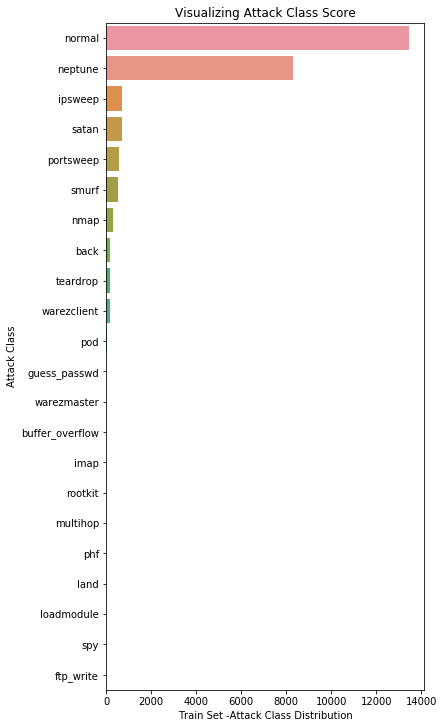

In [57]:
class_count = df['outcome'].value_counts()
class_count_df = class_count.to_frame().reset_index()
print(class_count_df)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=np.array(class_count), y=class_count_df['index'])
import seaborn as sns

plt.gcf().set_size_inches(5.7, 12.27)
# Add labels to your graph
plt.xlabel('Train Set -Attack Class Distribution')
plt.ylabel('Attack Class')
plt.title("Visualizing Attack Class Score")

              index  outcome
0            normal     2154
1           neptune     1581
2      guess_passwd     1231
3             mscan      996
4       warezmaster      944
5           apache2      737
6             satan      728
7      processtable      685
8             smurf      627
9              back      359
10        snmpguess      331
11            saint      309
12         mailbomb      293
13    snmpgetattack      178
14        portsweep      156
15          ipsweep      141
16       httptunnel      133
17             nmap       73
18              pod       41
19  buffer_overflow       20
20         multihop       18
21            named       17
22               ps       15
23         sendmail       14
24          rootkit       13
25            xterm       13
26         teardrop       12
27            xlock        9
28             land        7
29           xsnoop        4
30        ftp_write        3
31        sqlattack        2
32       loadmodule        2
33         udp

Text(0.5, 1.0, 'Visualizing Attack Class Score')

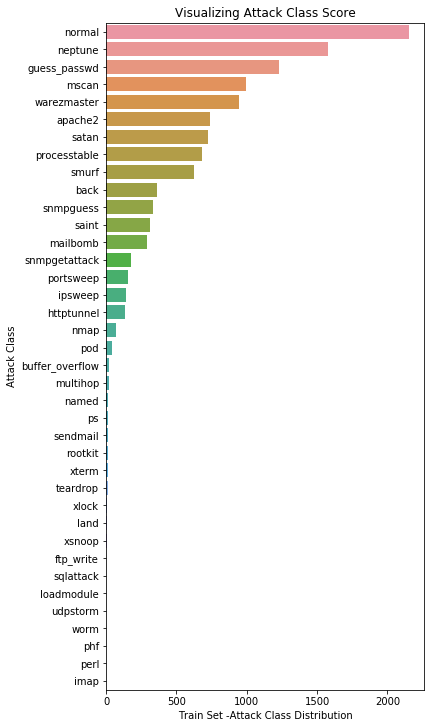

In [58]:
class_count = df1['outcome'].value_counts()
class_count_df = class_count.to_frame().reset_index()
print(class_count_df)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=np.array(class_count), y=class_count_df['index'])
import seaborn as sns

plt.gcf().set_size_inches(5.7, 12.27)
# Add labels to your graph
plt.xlabel('Train Set -Attack Class Distribution')
plt.ylabel('Attack Class')
plt.title("Visualizing Attack Class Score")

In [59]:
df=pd.read_csv("train_data.csv")
print("read{}rows".format(len(df)))
df.dropna(inplace=True,axis=1)

df.outcome[df.outcome=='apache2']='DoS'
df.outcome[df.outcome=='back']='DoS'
df.outcome[df.outcome=='buffer_overflow']='U2R'
df.outcome[df.outcome=='ftp_write']='R2L'
df.outcome[df.outcome=='guess_passwd']='R2L'
df.outcome[df.outcome=='httptunnel']='R2L'
df.outcome[df.outcome=='imap']='R2L'
df.outcome[df.outcome=='ipsweep']='Probe'
df.outcome[df.outcome=='land']='DoS'
df.outcome[df.outcome=='loadmodule']='U2R'
df.outcome[df.outcome=='mailbomb']='DoS'
df.outcome[df.outcome=='mscan']='Probe'
df.outcome[df.outcome=='multihop']='R2L'
df.outcome[df.outcome=='named']='R2L'
df.outcome[df.outcome=='neptune']='DoS'
df.outcome[df.outcome=='nmap']='Probe'
df.outcome[df.outcome=='normal']='Normal'
df.outcome[df.outcome=='perl']='U2R'
df.outcome[df.outcome=='phf']='R2L'
df.outcome[df.outcome=='pod']='DoS'
df.outcome[df.outcome=='portsweep']='Probe'
df.outcome[df.outcome=='processtable']='DoS'
df.outcome[df.outcome=='ps']='U2R'
df.outcome[df.outcome=='rootkit']='U2R'
df.outcome[df.outcome=='saint']='Probe'
df.outcome[df.outcome=='satan']='Probe'
df.outcome[df.outcome=='sendmail']='R2L'
df.outcome[df.outcome=='smurf']='DoS'
df.outcome[df.outcome=='snmpgetattack']='R2L'
df.outcome[df.outcome=='snmpguess']='R2L'
df.outcome[df.outcome=='spy']='R2L'
df.outcome[df.outcome=='sqlattack']='U2R'
df.outcome[df.outcome=='teardrop']='DoS'
df.outcome[df.outcome=='udpstorm']='DoS'
df.outcome[df.outcome=='warezclient']='R2L'
df.outcome[df.outcome=='warezmaster']='R2L'
df.outcome[df.outcome=='worm']='DoS'
df.outcome[df.outcome=='xlock']='R2L'
df.outcome[df.outcome=='xsnoop']='R2L'
df.outcome[df.outcome=='xterm']='U2R'
df.to_csv('level1.csv',index=False)

read25193rows


In [60]:
df1=pd.read_csv("test_data.csv")
print("read{}rows".format(len(df1)))
df1.dropna(inplace=True,axis=1)

df1.outcome[df1.outcome=='apache2']='DoS'
df1.outcome[df1.outcome=='back']='DoS'
df1.outcome[df1.outcome=='buffer_overflow']='U2R'
df1.outcome[df1.outcome=='ftp_write']='R2L'
df1.outcome[df1.outcome=='guess_passwd']='R2L'
df1.outcome[df1.outcome=='httptunnel']='R2L'
df1.outcome[df1.outcome=='imap']='R2L'
df1.outcome[df1.outcome=='ipsweep']='Probe'
df1.outcome[df1.outcome=='land']='DoS'
df1.outcome[df1.outcome=='loadmodule']='U2R'
df1.outcome[df1.outcome=='mailbomb']='DoS'
df1.outcome[df1.outcome=='mscan']='Probe'
df1.outcome[df1.outcome=='multihop']='R2L'
df1.outcome[df1.outcome=='named']='R2L'
df1.outcome[df1.outcome=='neptune']='DoS'
df1.outcome[df1.outcome=='nmap']='Probe'
df1.outcome[df1.outcome=='normal']='Normal'
df1.outcome[df1.outcome=='perl']='U2R'
df1.outcome[df1.outcome=='phf']='R2L'
df1.outcome[df1.outcome=='pod']='DoS'
df1.outcome[df1.outcome=='portsweep']='Probe'
df1.outcome[df1.outcome=='processtable']='DoS'
df1.outcome[df1.outcome=='ps']='U2R'
df1.outcome[df1.outcome=='rootkit']='U2R'
df1.outcome[df1.outcome=='saint']='Probe'
df1.outcome[df1.outcome=='satan']='Probe'
df1.outcome[df1.outcome=='sendmail']='R2L'
df1.outcome[df1.outcome=='smurf']='DoS'
df1.outcome[df1.outcome=='snmpgetattack']='R2L'
df1.outcome[df1.outcome=='snmpguess']='R2L'
df1.outcome[df1.outcome=='spy']='R2L'
df1.outcome[df1.outcome=='sqlattack']='U2R'
df1.outcome[df1.outcome=='teardrop']='DoS'
df1.outcome[df1.outcome=='udpstorm']='DoS'
df1.outcome[df1.outcome=='warezclient']='R2L'
df1.outcome[df1.outcome=='warezmaster']='R2L'
df1.outcome[df1.outcome=='worm']='DoS'
df1.outcome[df1.outcome=='xlock']='R2L'
df1.outcome[df1.outcome=='xsnoop']='R2L'
df1.outcome[df1.outcome=='xterm']='U2R'
df1.to_csv('level2.csv',index=False)

read11855rows


    index  outcome
0  Normal    13450
1     DoS     9234
2   Probe     2289
3     R2L      209
4     U2R       11
Total Number of Records = 25193


Text(0.5, 1.0, 'NSL KDD-20 Percent Training Set-Imbalance Class Distribution')

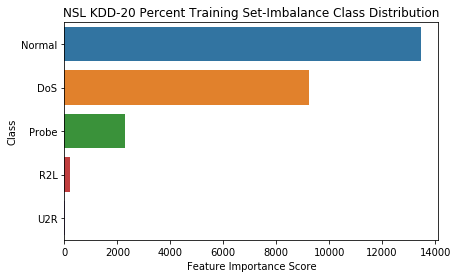

In [61]:
class_count = df['outcome'].value_counts()
class_count_df = class_count.to_frame().reset_index()
print(class_count_df)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=np.array(class_count), y=class_count_df['index'])
import seaborn as sns
print("Total Number of Records =",df.shape[0])
plt.gcf().set_size_inches(6.7, 4.0)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Class')
plt.title("NSL KDD-20 Percent Training Set-Imbalance Class Distribution")

    index  outcome
0     DoS     4346
1     R2L     2885
2   Probe     2403
3  Normal     2154
4     U2R       67
Total Number of Records = 11855


Text(0.5, 1.0, 'NSL KDD-20 Percent Test Set-Imbalance Class Distribution')

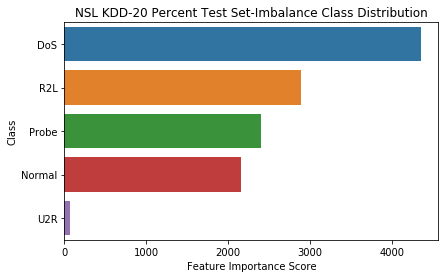

In [62]:
class_count = df1['outcome'].value_counts()
class_count_df = class_count.to_frame().reset_index()
print(class_count_df)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=np.array(class_count), y=class_count_df['index'])
import seaborn as sns
print("Total Number of Records =",df1.shape[0])
plt.gcf().set_size_inches(6.7, 4.0)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Class')
plt.title("NSL KDD-20 Percent Test Set-Imbalance Class Distribution")

In [63]:
df=pd.read_csv("level1.csv")
print("read{}rows".format(len(df)))
df.dropna(inplace=True,axis=1)
df.outcome[df.outcome=='Normal']=1
df.outcome[df.outcome=='DoS']=2
df.outcome[df.outcome=='Probe']=3
df.outcome[df.outcome=='R2L']=4
df.outcome[df.outcome=='U2R']=5
df.to_csv('level3.csv',index=False)

read25193rows


In [64]:
df1=pd.read_csv("level2.csv")
print("read{}rows".format(len(df1)))
df1.dropna(inplace=True,axis=1)
df1.outcome[df1.outcome=='Normal']=1
df1.outcome[df1.outcome=='DoS']=2
df1.outcome[df1.outcome=='Probe']=3
df1.outcome[df1.outcome=='R2L']=4
df1.outcome[df1.outcome=='U2R']=5
df1.to_csv('level4.csv',index=False)

read11855rows


   index  outcome
0      1    13450
1      2     9234
2      3     2289
3      4      209
4      5       11
Total Number of Records = 25193


Text(0.5, 1.0, 'NSL KDD-20 Percent Training Set-Class Distribution')

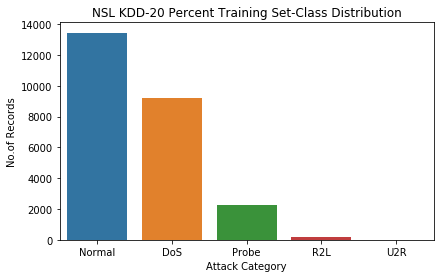

In [65]:
class_count = df['outcome'].value_counts()
class_count_df = class_count.to_frame().reset_index()
print(class_count_df)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=['Normal','DoS','Probe','R2L','U2R'],y=np.array(class_count))
import seaborn as sns
print("Total Number of Records =",df.shape[0])
plt.gcf().set_size_inches(6.7, 4.0)
# Add labels to your graph
plt.xlabel('Attack Category')
plt.ylabel('No.of Records')
plt.title("NSL KDD-20 Percent Training Set-Class Distribution")

   index  outcome
0      2     4346
1      4     2885
2      3     2403
3      1     2154
4      5       67
Total Number of Records = 11855


Text(0.5, 1.0, 'NSL KDD-20 Percent Test Set-Class Distribution')

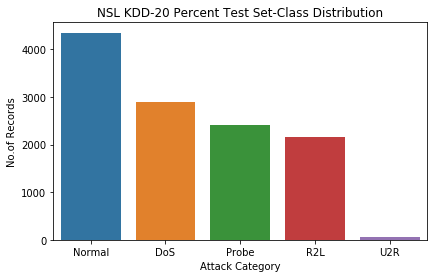

In [68]:
class_count = df1['outcome'].value_counts()
class_count_df = class_count.to_frame().reset_index()
print(class_count_df)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=['Normal','DoS','Probe','R2L','U2R'],y=np.array(class_count))
import seaborn as sns
print("Total Number of Records =",df1.shape[0])
plt.gcf().set_size_inches(6.7, 4.0)
# Add labels to your graph
plt.xlabel('Attack Category')
plt.ylabel('No.of Records')
plt.title("NSL KDD-20 Percent Test Set-Class Distribution")

In [69]:
def encode_text_dummy(df,name):
    dummies=pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name="{}-{}".format(name,x)
        df[dummy_name]=dummies[x]
    df.drop(name,axis=1,inplace=True)

In [98]:
import pandas as pd # to import csv and for data manipulation
import matplotlib.pyplot as plt # to plot graph
import seaborn as sns # for intractve graphs
import numpy as np # for linear algebra
import datetime # to dela with date and time
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler # for preprocessing the data
from sklearn.model_selection import train_test_split # to split the data
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import sklearn.metrics
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv("level3.csv")
data.dropna(inplace=True,axis=1)
data.describe()
data.shape
data.head()


data.outcome[data.outcome==1]=0
data.outcome[data.outcome==2]=0
data.outcome[data.outcome==3]=0
data.outcome[data.outcome==4]=1
data.outcome[data.outcome==5]=0

encode_text_dummy(data,'service')
encode_text_dummy(data,'protocol_type')
encode_text_dummy(data,'flag')
len(data.outcome[data.outcome==1])



209

Total Records: 25193
Normal 24984
Fraud 209


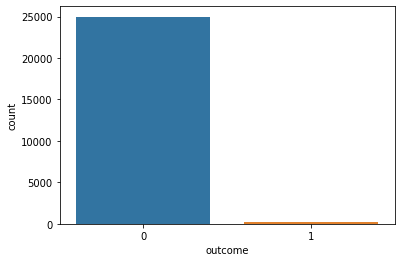

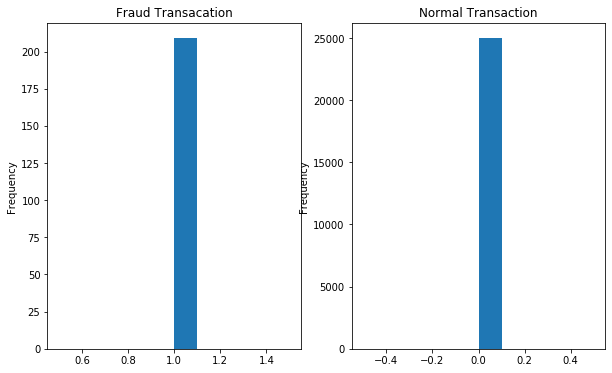

In [99]:
#Training Set
sns.countplot("outcome",data=data)
count_normal = len(data[data["outcome"]==0]) # normal transaction are repersented by 0
count_fraud = len(data[data["outcome"]==1]) # fraud by 1
total_record=count_normal+count_fraud
print('Total Records:',total_record)
print('Normal',count_normal)
print('Fraud',count_fraud)
#plot

Fraud_transacation = data[data["outcome"]==1]
Normal_transacation= data[data["outcome"]==0]
plt.figure(figsize=(10,6))
plt.subplot(121)
Fraud_transacation.outcome.plot.hist(title="Fraud Transacation")
plt.subplot(122)
Normal_transacation.outcome.plot.hist(title="Normal Transaction")
                


In [103]:
fraud_indices= np.array(data[data.outcome==1].index)
normal_indices = np.array(data[data.outcome==0].index)
print(len(normal_indices))
print(len(fraud_indices))
#normal_indices = [data[data.outcome==1].index,data[data.outcome==2].index,data[data.outcome==3].index,data[data.outcome==5].index]
def undersample(normal_indices,fraud_indices,times):#times denote the normal data = times*fraud data
    Normal_indices_undersample = np.array(np.random.choice(normal_indices,(times*count_fraud),replace=False))
    undersample_data= np.concatenate([fraud_indices,Normal_indices_undersample])
    undersample_data = data.iloc[undersample_data,:]
    return(undersample_data)

24984
209


In [104]:
def data_prepration(x): # preparing data for training and testing as we are going to use different data 
    #again and again so make a function
    x_features= x.ix[:,x.columns != "outcome"]
    x_labels=x.ix[:,x.columns=="outcome"]
    x_features_train,x_features_test,x_labels_train,x_labels_test = train_test_split(x_features,x_labels,test_size=0.3)
    print("length of training data")
    print(len(x_features_train))
    print("length of test data")
    print(len(x_features_test))
    return(x_features_train,x_features_test,x_labels_train,x_labels_test)

In [105]:
for i in range(1,4):
    Undersample_data = undersample(normal_indices,fraud_indices,i)
    x_train,y_train,x_test,y_test=data_prepration(Undersample_data)
     

length of training data
292
length of test data
126
length of training data
438
length of test data
189
length of training data
585
length of test data
251


Total Records: 11855
Normal 8970
Fraud 2885
% of Normal Record 75.6642766765078
% of Fraud Record 24.335723323492196


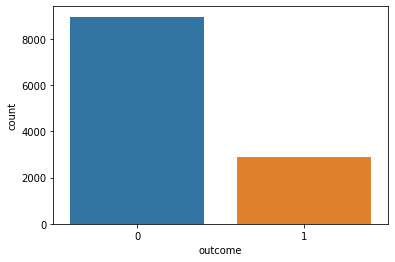

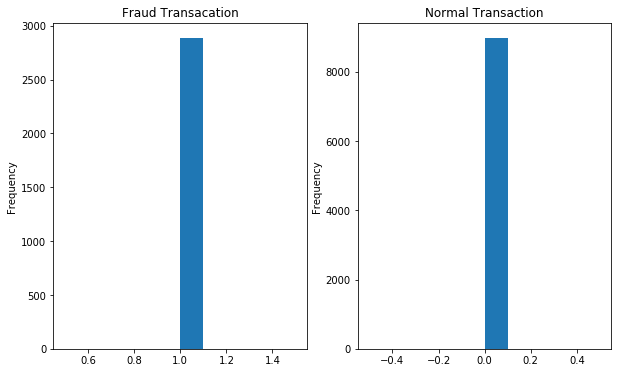

In [126]:
data1=pd.read_csv('level4.csv')
data1.dropna(inplace=True,axis=1)
data1.describe()
data1.shape
data1.head()


data1.outcome[data1.outcome==1]=0
data1.outcome[data1.outcome==2]=0
data1.outcome[data1.outcome==3]=0
data1.outcome[data1.outcome==4]=1
data1.outcome[data1.outcome==5]=0
len(data1.outcome[data1.outcome==1])

encode_text_dummy(data1,'service')
encode_text_dummy(data1,'flag')
encode_text_dummy(data1,'protocol_type')


sns.countplot("outcome",data=data1)
count_normal = len(data1[data1["outcome"]==0]) # normal transaction are repersented by 0
count_fraud = len(data1[data1["outcome"]==1]) # fraud by 1
total_record=count_normal+count_fraud
print('Total Records:',total_record)
print('Normal',count_normal)
print('Fraud',count_fraud)
print('% of Normal Record',float(count_normal)/float(total_record)*100)
print('% of Fraud Record',float(count_fraud)/float(total_record)*100)

#plot

Fraud_transacation = data1[data1["outcome"]==1]
Normal_transacation= data1[data1["outcome"]==0]
plt.figure(figsize=(10,6))
plt.subplot(121)
Fraud_transacation.outcome.plot.hist(title="Fraud Transacation")
plt.subplot(122)
Normal_transacation.outcome.plot.hist(title="Normal Transaction")

f=pd.concat([data1])
del f['outcome']

data1.head()
x = f.as_matrix()
y = data1['outcome'].as_matrix()


In [127]:
nb=GaussianNB()
nb.fit(x_train, x_test)  
predictions= nb.predict(y_train)
t1=accuracy_score(y_test, predictions)*100
print("Naive Bayes-Undersampling-Training Set- Accuracy is ", t1)
a= nb.predict(x)
print("Naive Bayes-Undersampling-Test Set- Accuracy is ", accuracy_score(y, a)*100)

Naive Bayes-Undersampling-Training Set- Accuracy is  77.29083665338645
Naive Bayes-Undersampling-Test Set- Accuracy is  77.03922395613665


In [128]:
dt=DecisionTreeClassifier()
dt.fit(x_train, x_test)  
predictions= dt.predict(y_train)
t2=accuracy_score(y_test, predictions)*100
print("DT-Undersampling-Training Set- Accuracy is ", t2)
b= dt.predict(x)
print("DT-Undersampling-Test Set- Accuracy is ", accuracy_score(y, b)*100)

DT-Undersampling-Training Set- Accuracy is  95.2191235059761
DT-Undersampling-Test Set- Accuracy is  66.62167861661746


In [129]:
lr=LogisticRegression()
lr.fit(x_train, x_test)  
predictions= lr.predict(y_train)
t3=accuracy_score(y_test, predictions)*100
print("LR-Undersampling-Training Set- Accuracy is ", t3)
c= lr.predict(x)
print("LR-Undersampling-Test Set- Accuracy is ", accuracy_score(y, c)*100)

LR-Undersampling-Training Set- Accuracy is  85.2589641434263
LR-Undersampling-Test Set- Accuracy is  76.65963728384648


In [130]:
nw=MLPClassifier()
nw.fit(x_train, x_test)  
predictions= nw.predict(y_train)
t4=accuracy_score(y_test, predictions)*100
print("Neural Nw-Undersampling-Training Set- Accuracy is ", t4)
d= nw.predict(x)
print("Neural Nw-Undersampling-Test Set- Accuracy is ", accuracy_score(y, d)*100)

Neural Nw-Undersampling-Training Set- Accuracy is  93.62549800796812
Neural Nw-Undersampling-Test Set- Accuracy is  74.29776465626318


In [131]:
svm=SVC(gamma='auto')
svm.fit(x_train, x_test)  
predictions= svm.predict(y_train)
t5=accuracy_score(y_test, predictions)*100
print("SVM-Undersampling-Training Set- Accuracy is ", t5)
e= svm.predict(x)
print("SVM-Undersampling-Test Set- Accuracy is ", accuracy_score(y, e)*100)

SVM-Undersampling-Training Set- Accuracy is  89.2430278884462
SVM-Undersampling-Test Set- Accuracy is  75.67271193589204


In [132]:
sgd=SGDClassifier()
sgd.fit(x_train, x_test)  
predictions= sgd.predict(y_train)
t6=accuracy_score(y_test, predictions)*100
print("SGD-Undersampling-Training Set- Accuracy is ", t6)
f= sgd.predict(x)
print("SGD-Undersampling-Test Set- Accuracy is ", accuracy_score(y, f)*100)

SGD-Undersampling-Training Set- Accuracy is  68.52589641434263
SGD-Undersampling-Test Set- Accuracy is  67.12779417967103


In [136]:
classifier = LDA()
classifier.fit(x_train, x_test)  
predictions= classifier.predict(y_train)
t7=accuracy_score(y_test, predictions)*100
print("LDA-Undersampling-Training Set- Accuracy is ", t7)
g= classifier.predict(x)
print("LDA-Undersampling-Test Set- Accuracy is ", accuracy_score(y, g)*100)

LDA-Undersampling-Training Set- Accuracy is  98.40637450199203
LDA-Undersampling-Test Set- Accuracy is  78.97089835512442


In [137]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, x_test)  
predictions= knn.predict(y_train)
t8=accuracy_score(y_test, predictions)*100
print("LDA-Undersampling-Training Set- Accuracy is ", t8)
h=knn.predict(x)
print("LDA-Undersampling-Test Set- Accuracy is ", accuracy_score(y, h)*100)

LDA-Undersampling-Training Set- Accuracy is  96.81274900398407
LDA-Undersampling-Test Set- Accuracy is  71.46351750316322


In [138]:
avg=accuracy_score(y, a)*100
print("NB-Test Set-Accuracy is ", accuracy_score(y, a)*100)

avg1=accuracy_score(y, b)*100
print("DT-Test Set-Accuracy is ", accuracy_score(y, b)*100)

avg2=accuracy_score(y, c)*100
print("LR-Test Set-Accuracy is ", accuracy_score(y, c)*100)

avg3=accuracy_score(y, d)*100
print("KNN-Test Set-Accuracy is ", accuracy_score(y, d)*100)

avg4=accuracy_score(y, e)*100
print("Neural NW-Test Set-Accuracy is ", accuracy_score(y, e)*100)

avg5=accuracy_score(y, f)*100
print("SVM-Test Set-Accuracy is ", accuracy_score(y, f)*100)

avg6=accuracy_score(y, g)*100
print("SGD-Test Set-Accuracy is ", accuracy_score(y, g)*100)

avg7=accuracy_score(y, h)*100
print("LDA-Test Set-Accuracy is ", accuracy_score(y, h)*100)



algorithm=['Naive Bayes','Decison Tree','Logistic Regression','KNN','Neural Network','SVM','SGD','LDA']
Training=[t1,t2,t3,t4,t5,t6,t7,t8]
Test=[avg,avg1,avg2,avg3,avg4,avg5,avg6,avg7]

df = pd.DataFrame({'Test Set': Test,'Training Set': Training}, index=algorithm)
df.T

df.to_csv('op.csv')

NB-Test Set-Accuracy is  77.03922395613665
DT-Test Set-Accuracy is  66.62167861661746
LR-Test Set-Accuracy is  76.65963728384648
KNN-Test Set-Accuracy is  74.29776465626318
Neural NW-Test Set-Accuracy is  75.67271193589204
SVM-Test Set-Accuracy is  67.12779417967103
SGD-Test Set-Accuracy is  78.97089835512442
LDA-Test Set-Accuracy is  71.46351750316322


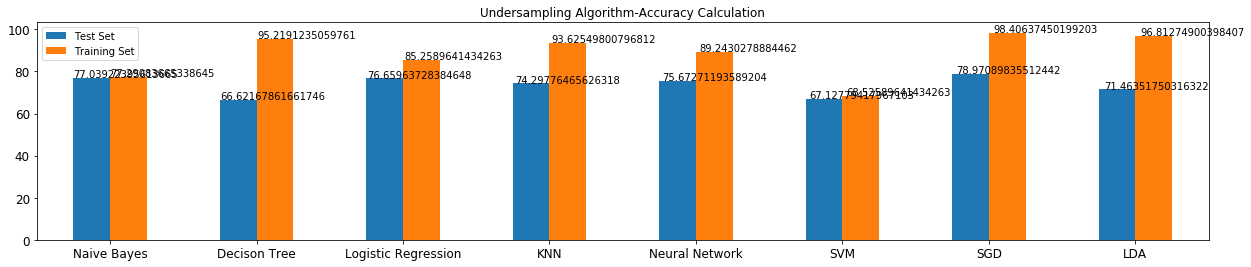

In [139]:
#sns.set_style("darkgrid")
ax = df.plot(kind='bar',rot=0,figsize=(21,4), title ="Undersampling Algorithm-Accuracy Calculation",legend=True, fontsize=12) 
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

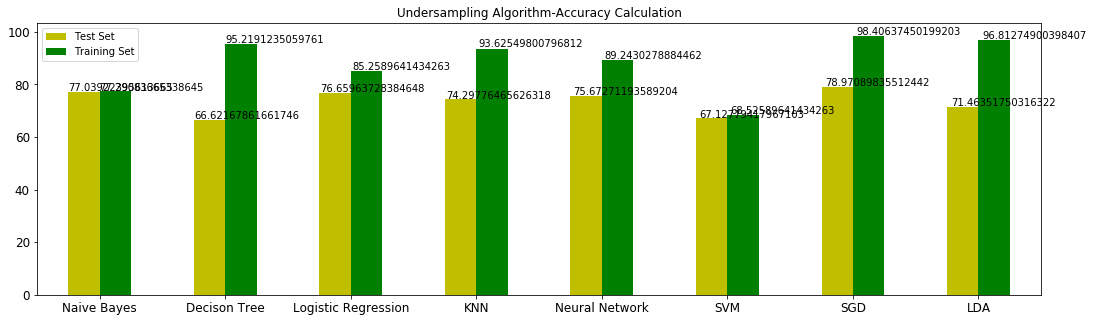

In [140]:
#sns.set_style("darkgrid")
ax = df.plot(kind='bar',rot=0,figsize=(18,5), title ="Undersampling Algorithm-Accuracy Calculation",legend=True, fontsize=12,color=['y', 'g', 'b']) 
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

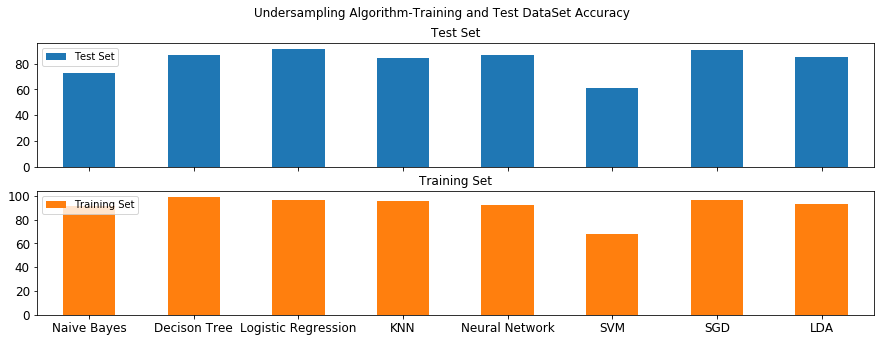

In [20]:
#sns.set_style("darkgrid")
ax = df.plot.bar(subplots=True,rot=0,figsize=(15,5), title ="Undersampling Algorithm-Training and Test DataSet Accuracy",legend=True, fontsize=12)
ax[1].legend(loc=2)  

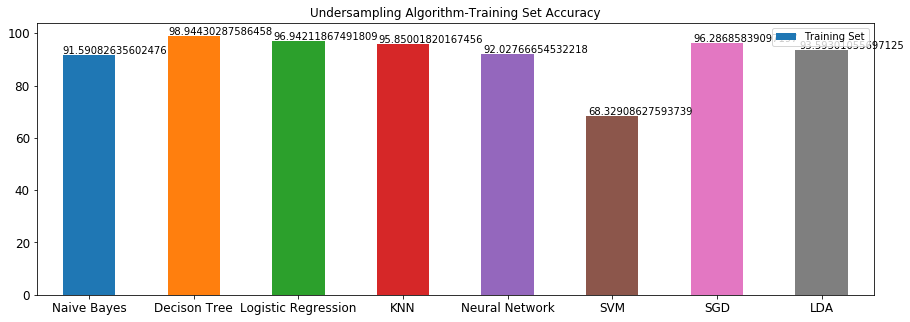

In [21]:
#sns.set_style("darkgrid")
ax = df.plot.bar(y='Training Set', rot=0,figsize=(15,5), title ="Undersampling Algorithm-Training Set Accuracy",legend=True, fontsize=12)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

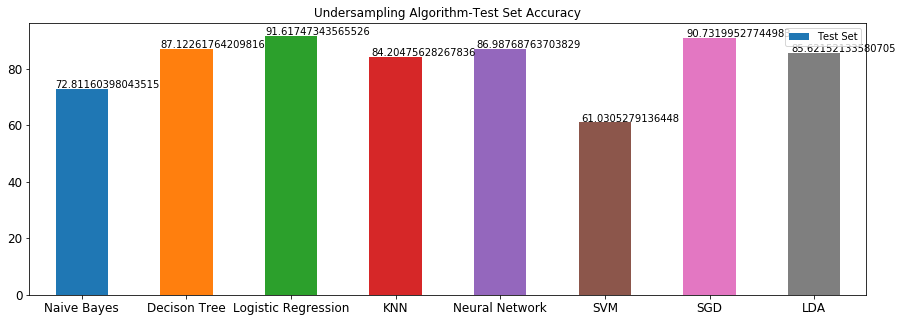

In [22]:
#sns.set_style("darkgrid")

ax = df.plot.bar(y='Test Set', rot=0,figsize=(15,5), title ="Undersampling Algorithm-Test Set Accuracy",legend=True, fontsize=12)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))